# 模擬ビーバー問題
以下の条件を満たす経路を求めるような問題
- 左上の点をスタート、右下の点をゴールとする
- 各点において右または下にしか進めない
- 最も花を多く拾える経路を求める
    - 道には花が落ちていてその道を通ると拾ったことになる
    - プログラムでは最小になっているが、最大にしたい時は重みを逆数にする

について
- 自動生成
  - 道の数を可変にする
- 正解を色付け

できるノートブック

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
def plot_graph(graph, NODE_SIZE=300, ARROW_SIZE=10, LABEL_SIZE=12, FIG_SIZE=(12,12), edge_color="k", node_color="#1f78b4"):
    plt.figure(figsize=FIG_SIZE)
    pos = {g: (g%col, -1 * int(g/col)) for g in graph.nodes}
    w = {(d[0], d[1]): d[2] for d in graph.edges.data("weight")}
    
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=w, font_size=LABEL_SIZE)
    nx.draw(graph, pos, with_labels=True, font_color='white', node_size=NODE_SIZE, font_size=LABEL_SIZE, arrowsize=ARROW_SIZE, edge_color=edge_color, node_color=node_color)
    plt.show();

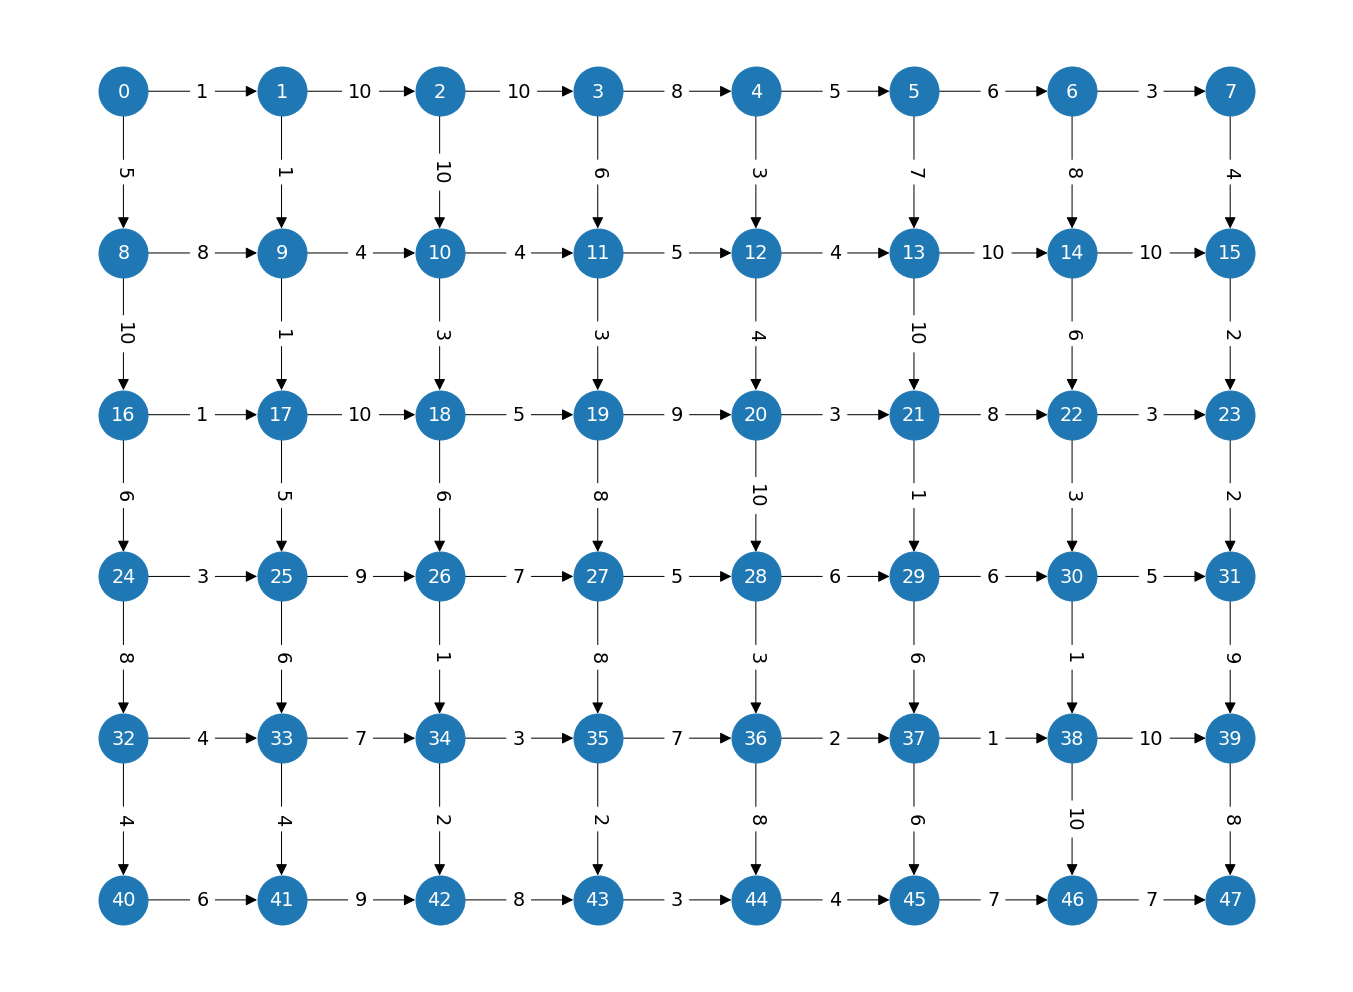

In [3]:
ratio = 8
col = 8
row = 6

NODE_SIZE = 300 * ratio
ARROW_SIZE = 10 * ratio * 0.3
LABEL_SIZE = 12 * ratio * 0.2
FIG_SIZE = (col * 3, row * 3)


graph = nx.DiGraph()
yoko = []
for i in range(row):
    yoko +=  [(j, j+1, {"weight": random.randint(1,10)}) for j in range(i*col, (i+1)*col-1)]

tate = []
for i in range(col):
    tate += [(col * j + i, col * (j+1) + i, {"weight": random.randint(1,10)}) for j in range(row-1)]
    
graph.add_edges_from(yoko + tate)
plot_graph(graph, NODE_SIZE, ARROW_SIZE, LABEL_SIZE, FIG_SIZE)

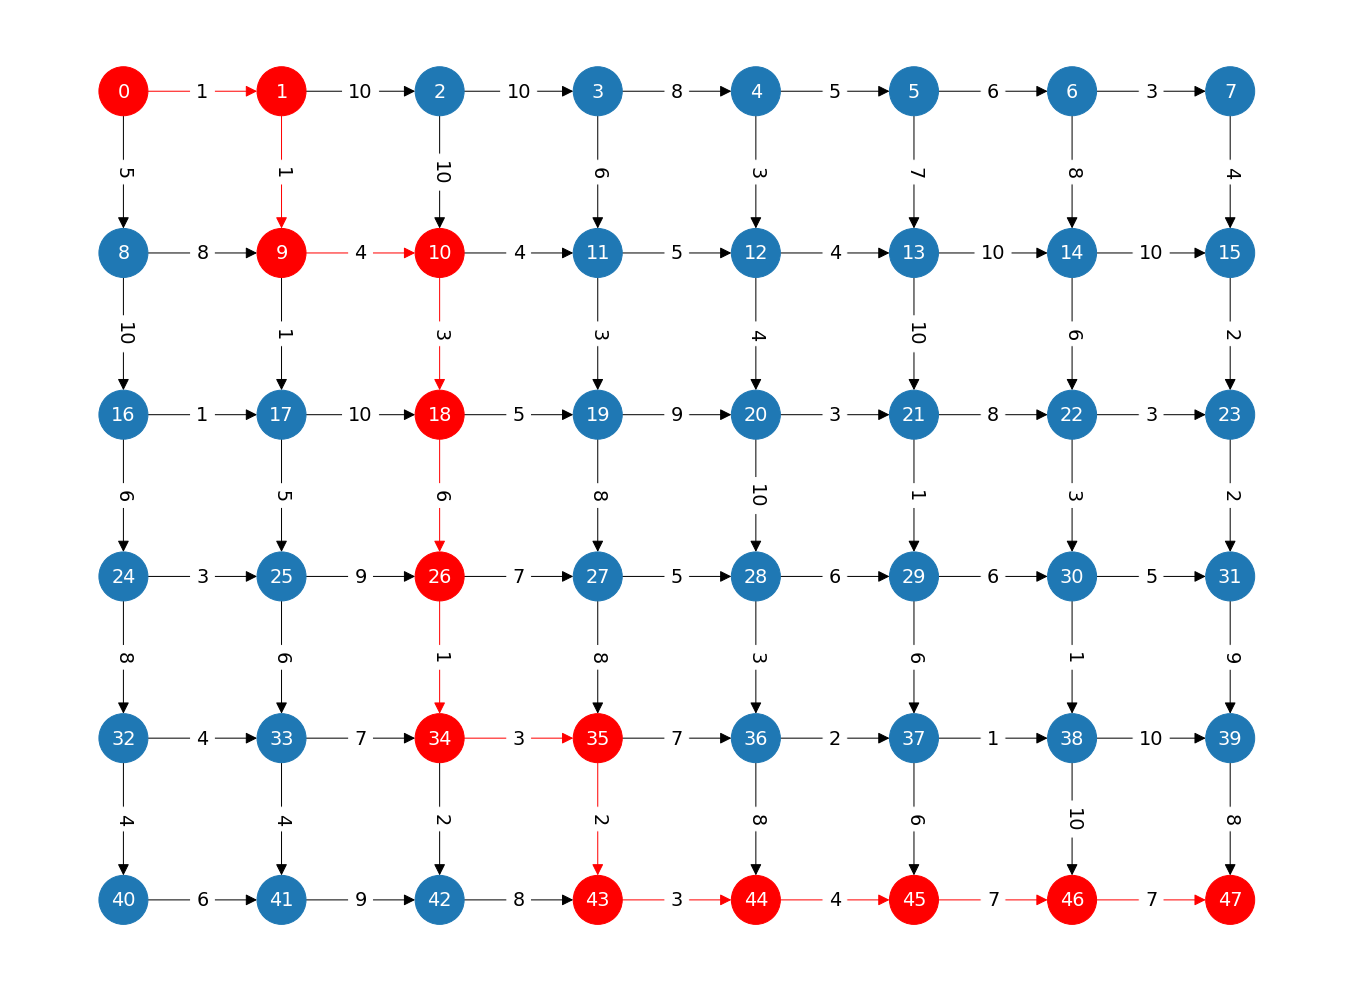

In [4]:
path = nx.dijkstra_path(graph, 0, col*row-1)
hilighted_nodes = ["r" if e in path else "#1f78b4" for e in graph.nodes]

arrows = [(path[i], path[i+1]) for i in range(len(path)-1)]
hilighted_edges = ["r" if e in arrows else "k" for e in graph.edges]

plot_graph(graph, NODE_SIZE, ARROW_SIZE, LABEL_SIZE, FIG_SIZE, hilighted_edges, hilighted_nodes)